In [1]:
from api.models import *
from django.db.models import Subquery, OuterRef, F, Q
import pandas as pd
import matplotlib
%matplotlib inline


ModuleNotFoundError: No module named 'api'

In [ ]:
matplotlib.rcParams['figure.figsize'] = [20.0, 12.0]
df = pd.DataFrame(list(PostsWords.objects.filter(word__iexact='украина').values()))

In [2]:
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
grouped = df.groupby(['date'])

<AxesSubplot:xlabel='date'>

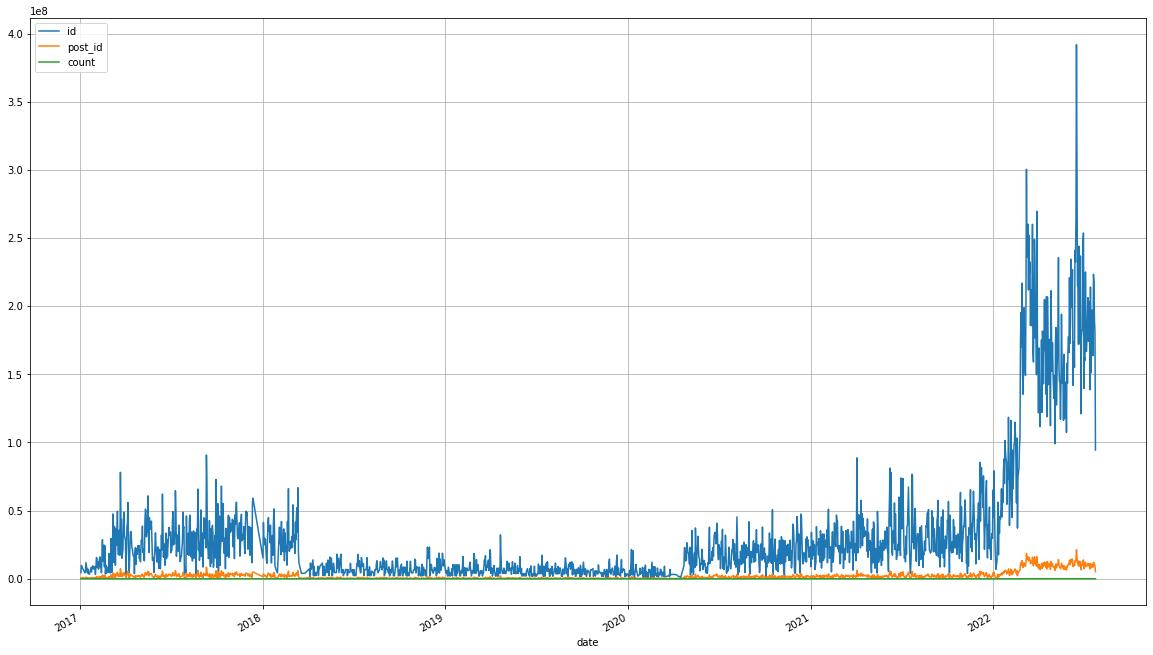

In [3]:
grouped.sum().plot(grid=True)

In [4]:
grouped.sum().head(10)

,id,post_id,count
date,,,
2017-01-02,4423736,400406,1
2017-01-03,9800310,800701,2
2017-01-05,7889177,800255,2
2017-01-10,4314645,399442,1
2017-01-11,5124019,399351,1
2017-01-12,11922124,1197758,3
2017-01-15,4347963,398907,1
2017-01-16,7101872,797449,2
2017-01-17,3868723,398578,1


In [5]:
grouped.sum()['count'].head(10)

date
2017-01-02    1
2017-01-03    2
2017-01-05    2
2017-01-10    1
2017-01-11    1
2017-01-12    3
2017-01-15    1
2017-01-16    2
2017-01-17    1
2017-01-18    1
Name: count, dtype: int64

<AxesSubplot:xlabel='date'>

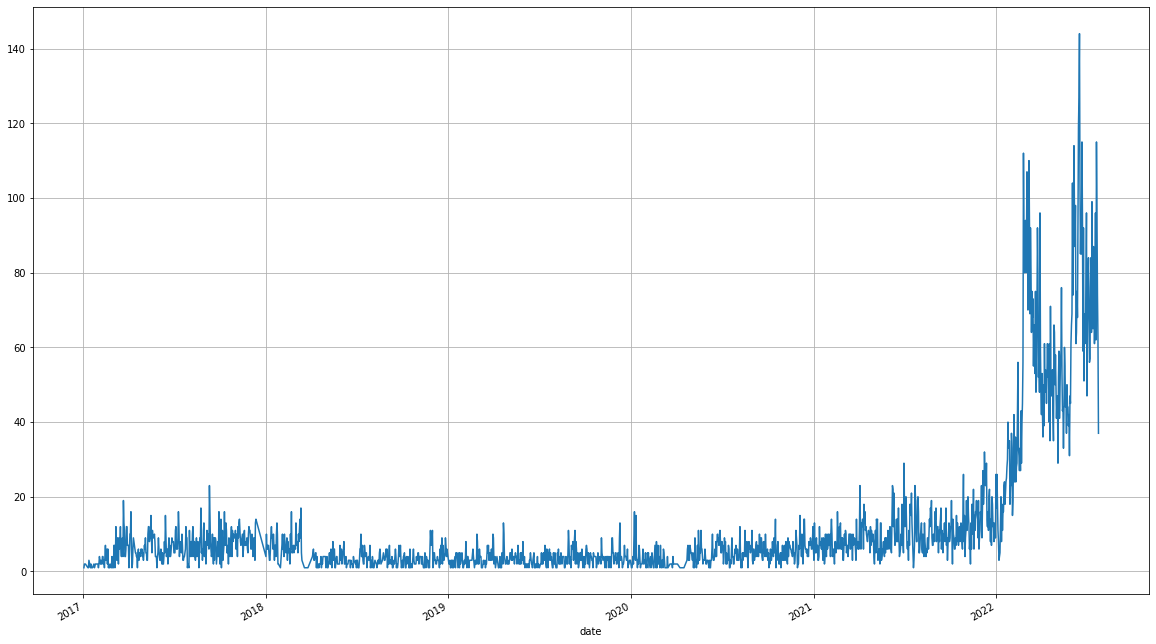

In [6]:
grouped.sum()['count'].plot(grid=True)

In [13]:
import statsmodels.api as sm
dt_set = grouped.sum()['count']
tdi = pd.DatetimeIndex(pd.to_datetime(dt_set, unit='s'))
dt_set.set_index(tdi, inplace=True)

decomposed = sm.tsa.seasonal_decompose(dt_set, model='additive')
decomposed.plot()

AttributeError: 'Series' object has no attribute 'set_index'

<AxesSubplot:xlabel='word,date'>

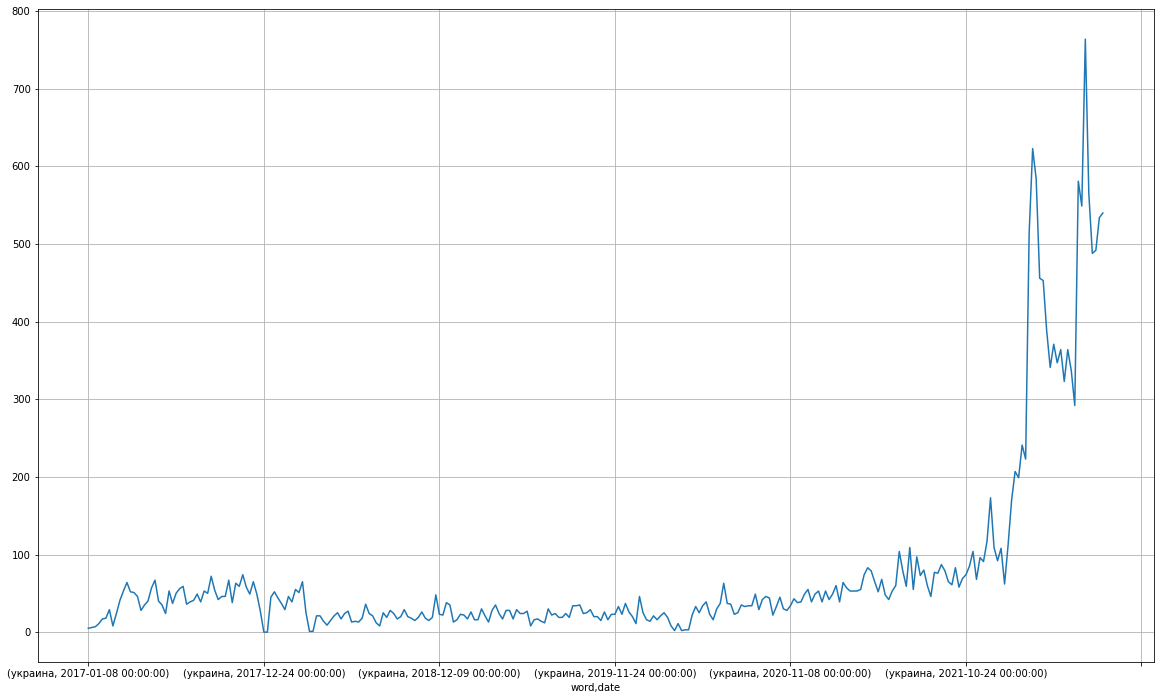

In [8]:
grouped_by_weeks = df.set_index('date').groupby('date')['count'].resample('W').sum()
grouped_by_weeks.head(10)
grouped_by_weeks.plot(grid=True)